In [2]:
import sys, os

sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import numpy as np
from PIL import Image
import pickle
from common.functions import sigmoid, softmax


In [3]:
def sum_squared_error(y, t):
    """二乗和誤差

    Args:
        y (_type_): _description_
        t (_type_): _description_

    Returns:
        _type_: _description_
    """
    return 0.5 * np.sum((y - t) ** 2)


In [4]:
# 2を正解とするラベルを作成
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# ニューラルネットワークの出力を仮で作成。2の確率が最も高くなるように。
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squared_error(np.array(y), np.array(t))


0.09750000000000003

In [5]:
# ニューラルネットワークの出力を仮で作成。7の確率が最も高くなるように。
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squared_error(np.array(y), np.array(t))


0.5975

In [6]:
def cross_entropy_error(y, t):
    """交差エントロピー誤差

    Args:
        y (_type_): _description_
        t (_type_): _description_

    Returns:
        _type_: _description_
    """
    if y.ndim == 1:
        # データが1次元の場合
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    # 微小な値を足している。log(0)だとマイナス無限になるので、それの対策
    delta = 1e-7
    # データ1つあたりの平均交差エントロピー誤差を計算
    return -np.sum(t * np.log(y + delta)) / batch_size


In [7]:
# 2を正解とするラベルを作成
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# ニューラルネットワークの出力を仮で作成。2の確率が最も高くなるように。
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))


0.510825457099338

In [8]:
# ニューラルネットワークの出力を仮で作成。7の確率が最も高くなるように。
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))


2.302584092994546

In [9]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)


(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10
# 60000個のデータから10個ランダムに抽出
# batch_sizeにはミニバッチに使用するデータのインデックスが格納されている
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


In [11]:
def numerical_diff(f, x):
    """中心差分による数値微分

    Args:
        f (_type_): function
        x (_type_): _description_

    Returns:
        _type_: _description_
    """
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)


In [12]:
def function_1(x):
    return 0.01 * x**2 + 0.1 * x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


0.1999999999990898


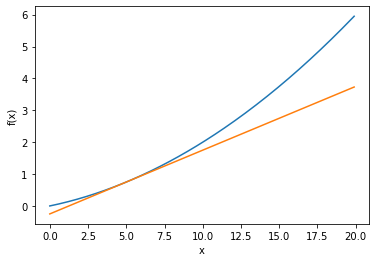

In [13]:
from matplotlib import pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)


In [14]:
numerical_diff(function_1, 5)


0.1999999999990898

In [15]:
numerical_diff(function_1, 10)


0.2999999999986347

Text(0, 0.5, 'X1')

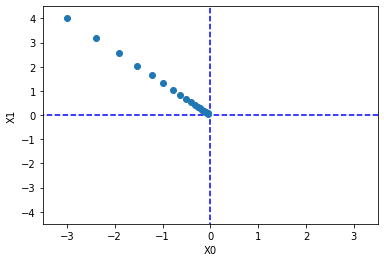

In [26]:
from ch04.gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0] ** 2 + x[1] ** 2


init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot([-5, 5], [0, 0], "--b")
plt.plot([0, 0], [-5, 5], "--b")
plt.plot(x_history[:, 0], x_history[:, 1], "o")

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")


In [28]:
from common.gradient import numerical_gradient
from common.functions import cross_entropy_error


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


In [30]:
net = simpleNet()
print(net.W)


[[-0.06993382  1.48032082  1.5667383 ]
 [-0.52464185 -1.06340511  2.3530399 ]]


In [31]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
np.argmax(p)


[-0.51413796 -0.06887211  3.0577789 ]


2

In [32]:
t = np.array([0, 0, 1])
net.loss(x, t)


0.06949460052603786

In [33]:
def f(W):
    return net.loss(x, t)


dW = numerical_gradient(f, net.W)
print(dW)


[[ 0.01572919  0.02455177 -0.04028095]
 [ 0.02359378  0.03682765 -0.06042143]]


In [34]:
from common.functions import *


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_sizes, weight_init_sdt=0.01):
        # 重みの初期化
        # 重みはガウス分布に従う乱数で初期化。バイアスは0で初期化
        self.params = {}
        self.params["W1"] = weight_init_sdt * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_sdt * np.random.randn(hidden_size, output_sizes)
        self.params["b2"] = np.zeros(output_sizes)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    def loss(self, x, t):
        """loss関数

        Args:
            x (_type_): 入力データ
            t (_type_): 教師データ
        """

        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        # 処理に時間がかかる。現在の環境だと2分ぐらい。
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        return grads


In [36]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_sizes=10)
net.params["W1"].shape


(784, 100)

In [38]:
# 推論の実行
x = np.random.rand(100, 784)
y = net.predict(x)


In [39]:
# 勾配情報の確認
t = np.random.rand(100, 10)
grads = net.numerical_gradient(x, y)
grads["W1"].shape


(784, 100)

train acc, test acc |0.10441666666666667,0.1028
train acc, test acc |0.7954333333333333,0.8022
train acc, test acc |0.8770333333333333,0.881
train acc, test acc |0.8979166666666667,0.9007
train acc, test acc |0.9069,0.9105
train acc, test acc |0.91315,0.9154
train acc, test acc |0.9193333333333333,0.9225
train acc, test acc |0.9225666666666666,0.9237
train acc, test acc |0.9276,0.9285
train acc, test acc |0.9302,0.9327
train acc, test acc |0.9332166666666667,0.934
train acc, test acc |0.9364,0.9371
train acc, test acc |0.9381,0.9373
train acc, test acc |0.9406666666666667,0.9381
train acc, test acc |0.9430666666666667,0.9407
train acc, test acc |0.94465,0.9425
train acc, test acc |0.9463,0.9438


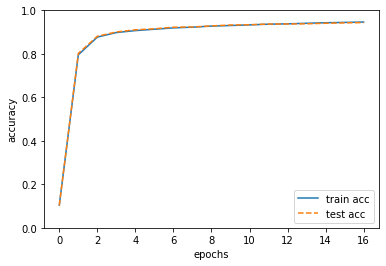

In [45]:
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list=[]

# ハイパーパラメータ
iters_num = 10000
batch_size = 100
learning_rate = 0.1

# 1エポックあたりの繰り返し数
iter_per_epoch=max(train_size/batch_size,1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # ミニバッチ処理
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    # grad = network.numerical_gradient(x_batch,t_batch)
    grad = network.gradient(x_batch, t_batch)  # 高速版

    # パラメータの更新
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    # 学習経過の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1エポック事に認識精度を計算
    if i%iter_per_epoch==0:
        # 今回は10回の繰り返し事に処理が実行される。
        train_acc=network.accuracy(x_train,t_train)
        test_acc=network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc |"+str(train_acc)+","+str(test_acc))


markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')